In [1]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 65.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 65.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 101.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 46.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_train = pd.read_csv('/content/drive/MyDrive/waterQuality/all4classes.csv')

In [5]:
data_train['cod'].value_counts()

2    5572
0    5032
1    4825
3    4395
Name: cod, dtype: int64

In [6]:
import pandas as pd
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses

from tensorflow.keras.metrics import AUC

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(data_train['body'],\
                                                      data_train['cod'],\
                                                      test_size=0.2,\
                                                      random_state=0)

In [8]:
# Building model with transformer
model_name = 'bert-base-cased'

trans = text.Transformer(model_name, maxlen=128)

In [9]:
X_train = X_train.values.astype(str).tolist()
y_train = y_train.values.astype(str).tolist()

X_test = X_test.values.astype(str).tolist()
y_test = y_test.values.astype(str).tolist()

In [10]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 23
	95percentile : 41
	99percentile : 44


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 23
	95percentile : 41
	99percentile : 44


In [11]:
# getting bert-base model.
model = trans.get_classifier()

In [12]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 32)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
# Training model
callbacks = [EarlyStopping(monitor='val_loss', patience=3)]

history = learner.fit_onecycle(lr = 1e-5, epochs = 10) #2e-5, 1e-4



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/10
496/496 [==============================] - 81s 118ms/step - loss: 1.2946 - accuracy: 0.3761 - val_loss: 1.0641 - val_accuracy: 0.5387
Epoch 2/10
496/496 [==============================] - 54s 109ms/step - loss: 0.8523 - accuracy: 0.6591 - val_loss: 0.6446 - val_accuracy: 0.7670
Epoch 3/10
496/496 [==============================] - 54s 109ms/step - loss: 0.5379 - accuracy: 0.8021 - val_loss: 0.4843 - val_accuracy: 0.8159
Epoch 4/10
496/496 [==============================] - 54s 109ms/step - loss: 0.4221 - accuracy: 0.8390 - val_loss: 0.4632 - val_accuracy: 0.8275
Epoch 5/10
496/496 [==============================] - 54s 110ms/step - loss: 0.3586 - accuracy: 0.8629 - val_loss: 0.4683 - val_accuracy: 0.8315
Epoch 6/10
496/496 [==============================] - 54s 110ms/step - loss: 0.2980 - accuracy: 0.8881 - val_loss: 0.4739 - val_accuracy: 0.8277
Epoch 7/10
496/496 [==============================] - 54s 109ms/ste

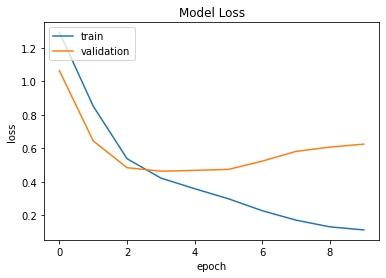

In [15]:
learner.plot('loss')

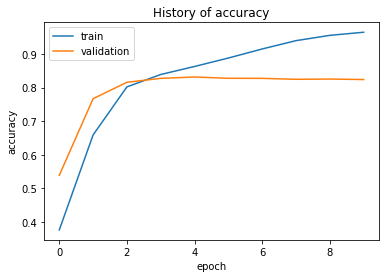

In [16]:
learner.plot('accuracy')


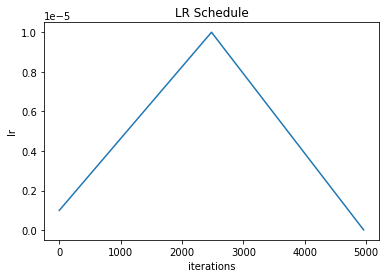

In [17]:
learner.plot('lr')

In [18]:
learner.validate()

124/124 [==============================] - 8s 40ms/step
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       972
           1       0.94      0.91      0.93       996
           2       0.83      0.79      0.81      1091
           3       0.74      0.83      0.78       906

    accuracy                           0.82      3965
   macro avg       0.82      0.82      0.82      3965
weighted avg       0.83      0.82      0.82      3965



array([[747,  24,  87, 114],
       [ 35, 911,  27,  23],
       [ 89,  18, 861, 123],
       [ 84,  16,  58, 748]])